In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from data_profiling import ProfileReport

In [ ]:
df=pd.read_csv('/content/MainDataSet..csv')
df

,State/UT,Year,Population,Population Density (per sq km),Major Floods,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%),Reasons Behind Floods
0,Andhra Pradesh,2001,"75,727,541",275,"2009, 2010",High,0.41,High,24.4,"Heavy rainfall, river overflow, cyclones"
1,NaN,2011,"84,665,533",308,"2015, 2016",High,0.41,High,29.6,"Heavy rainfall, river overflow, cyclones"
2,NaN,2021,"49,386,799*",304,"2019, 2020, 2021",High,0.41,High,33.4,"Heavy rainfall, river overflow, cyclones"
3,Bihar,2001,"82,998,509",880,"2007, 2008",High,0.10,High,10.5,"Heavy rainfall, river overflow, poor drainage"
4,NaN,2011,"104,099,452","1,106","2013, 2014",High,0.10,High,11.3,"Heavy rainfall, river overflow, poor drainage"
...,...,...,...,...,...,...,...,...,...,...
94,NaN,2011,"64,429","2,149","2013, 2014",Low,0.10,Low,45.3,"Heavy rainfall, sea level rise, poor drainage"
95,NaN,2021,"68,000","2,149","2019, 2020",Low,0.10,Low,45.3,"Heavy rainfall, sea level rise, poor drainage"
96,Andaman & Nicobar,2001,"356,152",46,"2005, 2007",Low,0.10,Low,37.8,"Heavy rainfall, sea level rise, poor drainage"
97,NaN,2011,"380,581",46,"2013, 2014",Low,0.10,Low,37.8,"Heavy rainfall, sea level rise, poor drainage"


In [ ]:
pop_to_state = {row['Population']: row['State/UT'] for index, row in df.iterrows() if pd.notna(row['State/UT'])}

df['State/UT'] = df.apply(
    lambda row: pop_to_state[row['Population']] if pd.isna(row['State/UT']) and row['Population'] in pop_to_state else row['State/UT'],
    axis=1
)
df.fillna(method='ffill', inplace=True)

In [ ]:
df.head()

,State/UT,Year,Population,Population Density (per sq km),Major Floods,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%),Reasons Behind Floods
0,Andhra Pradesh,2001,"75,727,541",275,"2009, 2010",High,0.41,High,24.4,"Heavy rainfall, river overflow, cyclones"
1,Andhra Pradesh,2011,"84,665,533",308,"2015, 2016",High,0.41,High,29.6,"Heavy rainfall, river overflow, cyclones"
2,Andhra Pradesh,2021,"49,386,799*",304,"2019, 2020, 2021",High,0.41,High,33.4,"Heavy rainfall, river overflow, cyclones"
3,Bihar,2001,"82,998,509",880,"2007, 2008",High,0.10,High,10.5,"Heavy rainfall, river overflow, poor drainage"
4,Bihar,2011,"104,099,452","1,106","2013, 2014",High,0.10,High,11.3,"Heavy rainfall, river overflow, poor drainage"


In [ ]:

# Generate the profiling report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# # Save the report as an HTML file
# profile.to_file("your_report.html")

# # If you are using a Jupyter notebook, you can display the report inline
# profile.to_notebook_iframe()

In [ ]:
# DATA PREPARATION
# Encode categorical variables
df['Frequency of Floods'] = df['Frequency of Floods'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df['Floodplain Encroachment'] = df['Floodplain Encroachment'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df

,State/UT,Year,Population,Population Density (per sq km),Major Floods,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%),Reasons Behind Floods
0,Andhra Pradesh,2001,"75,727,541",275,"2009, 2010",2,0.41,2,24.4,"Heavy rainfall, river overflow, cyclones"
1,Andhra Pradesh,2011,"84,665,533",308,"2015, 2016",2,0.41,2,29.6,"Heavy rainfall, river overflow, cyclones"
2,Andhra Pradesh,2021,"49,386,799*",304,"2019, 2020, 2021",2,0.41,2,33.4,"Heavy rainfall, river overflow, cyclones"
3,Bihar,2001,"82,998,509",880,"2007, 2008",2,0.10,2,10.5,"Heavy rainfall, river overflow, poor drainage"
4,Bihar,2011,"104,099,452","1,106","2013, 2014",2,0.10,2,11.3,"Heavy rainfall, river overflow, poor drainage"
...,...,...,...,...,...,...,...,...,...,...
94,Lakshadweep,2011,"64,429","2,149","2013, 2014",0,0.10,0,45.3,"Heavy rainfall, sea level rise, poor drainage"
95,Lakshadweep,2021,"68,000","2,149","2019, 2020",0,0.10,0,45.3,"Heavy rainfall, sea level rise, poor drainage"
96,Andaman & Nicobar,2001,"356,152",46,"2005, 2007",0,0.10,0,37.8,"Heavy rainfall, sea level rise, poor drainage"
97,Andaman & Nicobar,2011,"380,581",46,"2013, 2014",0,0.10,0,37.8,"Heavy rainfall, sea level rise, poor drainage"


In [ ]:
# Remove commas from numeric columns and convert to integers
df['Population Density (per sq km)'] = df['Population Density (per sq km)'].str.replace(',', '').astype(int)
df['Population'] = df['Population'].str.replace(',', '').str.replace('*', '').astype(int)

# Convert the year to integers
df['Year'] = df['Year'].astype(int)

# Convert percentages to floats
df['Deforestation Rate (%)'] = df['Deforestation Rate (%)'].astype(float)
df['Urbanization (%)'] = df['Urbanization (%)'].astype(float)
df.head(5)

,State/UT,Year,Population,Population Density (per sq km),Major Floods,Frequency of Floods,Deforestation Rate (%),Floodplain Encroachment,Urbanization (%),Reasons Behind Floods
0,Andhra Pradesh,2001,75727541,275,"2009, 2010",2,0.41,2,24.4,"Heavy rainfall, river overflow, cyclones"
1,Andhra Pradesh,2011,84665533,308,"2015, 2016",2,0.41,2,29.6,"Heavy rainfall, river overflow, cyclones"
2,Andhra Pradesh,2021,49386799,304,"2019, 2020, 2021",2,0.41,2,33.4,"Heavy rainfall, river overflow, cyclones"
3,Bihar,2001,82998509,880,"2007, 2008",2,0.10,2,10.5,"Heavy rainfall, river overflow, poor drainage"
4,Bihar,2011,104099452,1106,"2013, 2014",2,0.10,2,11.3,"Heavy rainfall, river overflow, poor drainage"


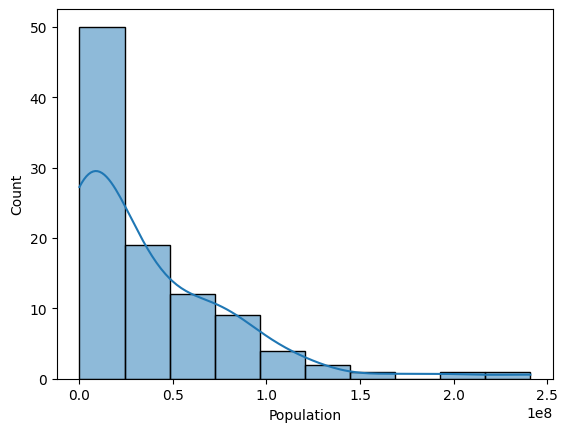

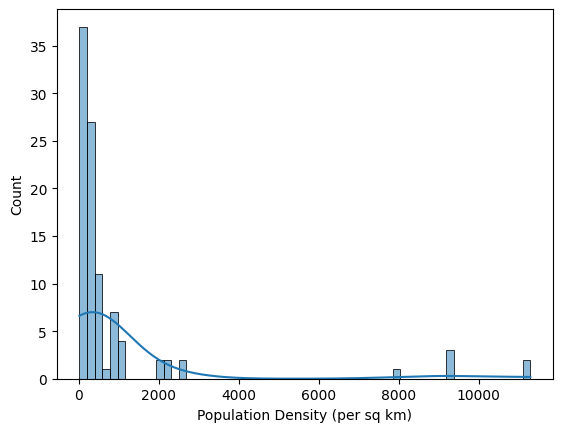

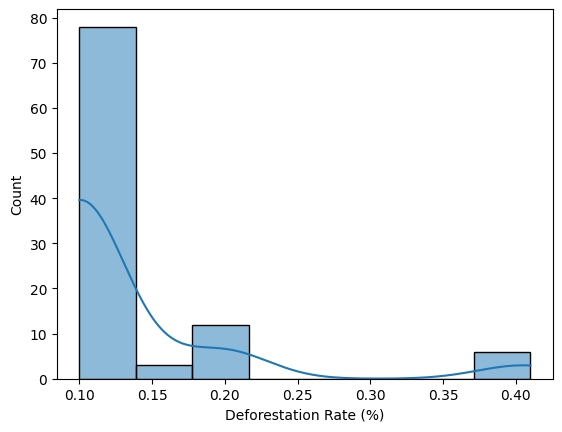

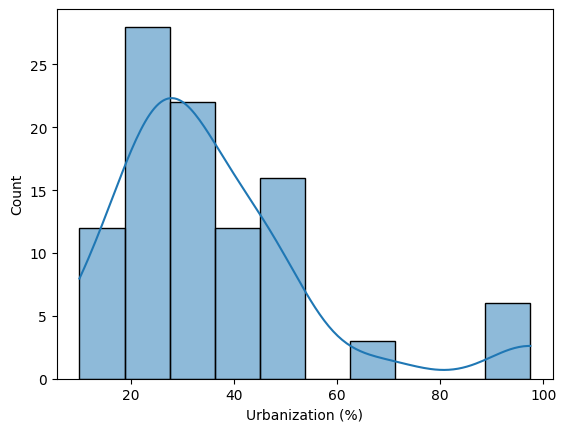

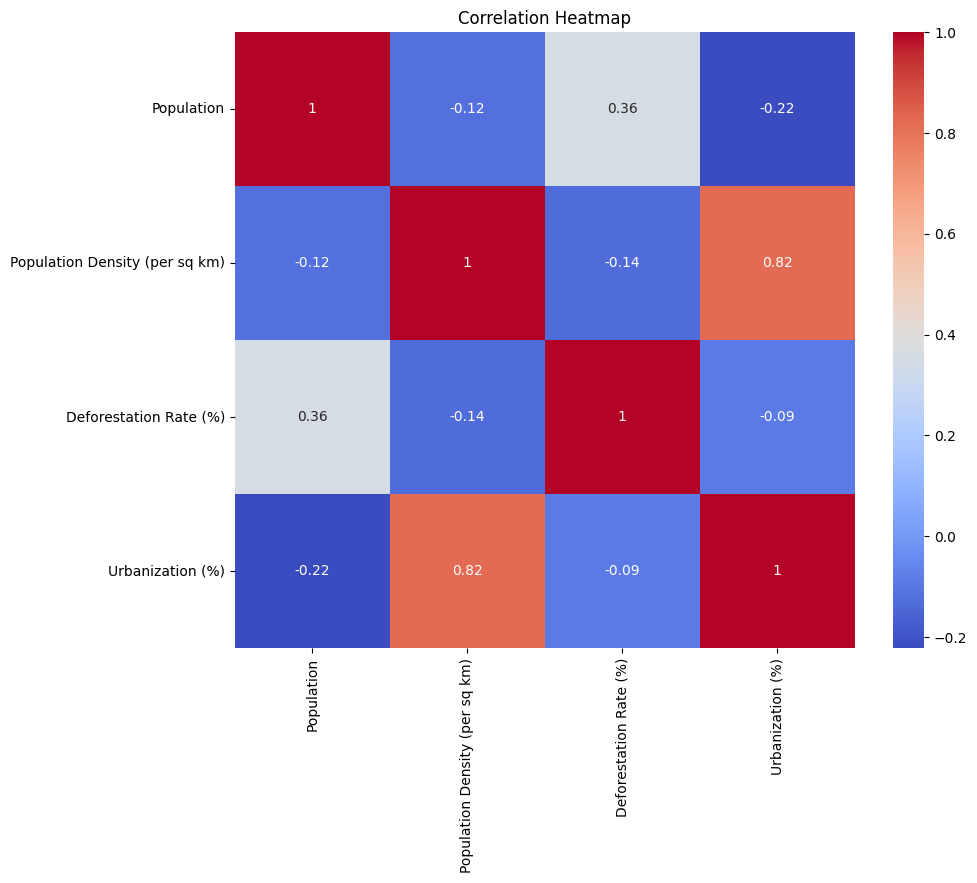

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distributions
sns.histplot(df['Population'], kde=True)
plt.show()

sns.histplot(df['Population Density (per sq km)'], kde=True)
plt.show()

sns.histplot(df['Deforestation Rate (%)'], kde=True)
plt.show()

sns.histplot(df['Urbanization (%)'], kde=True)
plt.show()

# Drop non-numeric columns for correlation analysis
df_numeric = df[['Population', 'Population Density (per sq km)', 'Deforestation Rate (%)', 'Urbanization (%)']]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-10-306e7068c398>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




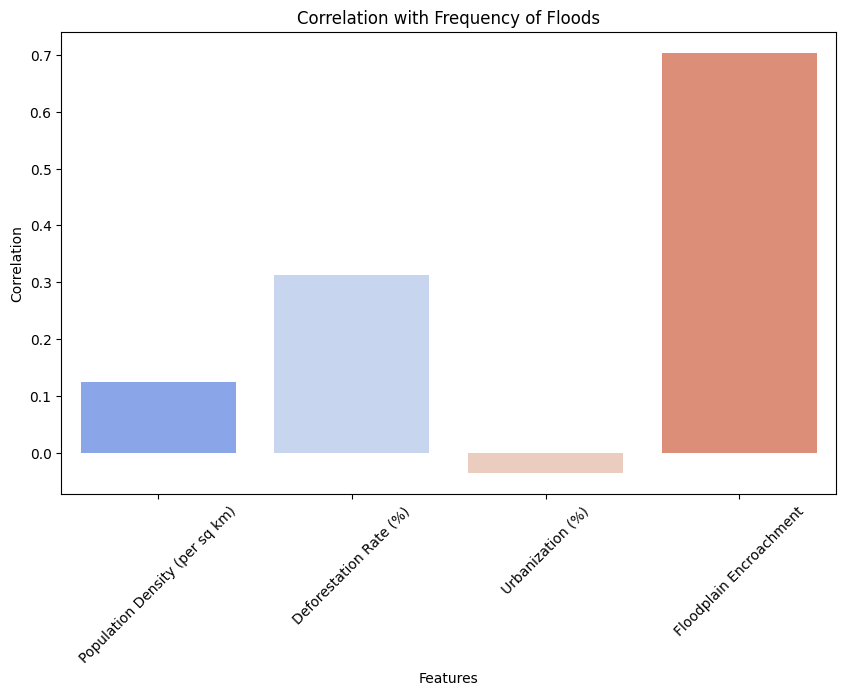

In [ ]:
# Encode categorical variables (e.g., Floodplain Encroachment and Frequency of Floods)
df['Floodplain Encroachment'] = df['Floodplain Encroachment'].astype('category').cat.codes
df['Frequency of Floods'] = df['Frequency of Floods'].astype('category').cat.codes

# Create a DataFrame for correlation
df_corr = df[['Population Density (per sq km)', 'Deforestation Rate (%)', 'Urbanization (%)', 'Floodplain Encroachment', 'Frequency of Floods']]

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Extract correlation with Frequency of Floods
corr_with_floods = corr_matrix['Frequency of Floods'].drop('Frequency of Floods')

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_floods.index, y=corr_with_floods.values, palette='coolwarm')
plt.title('Correlation with Frequency of Floods')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-84edf470f899>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



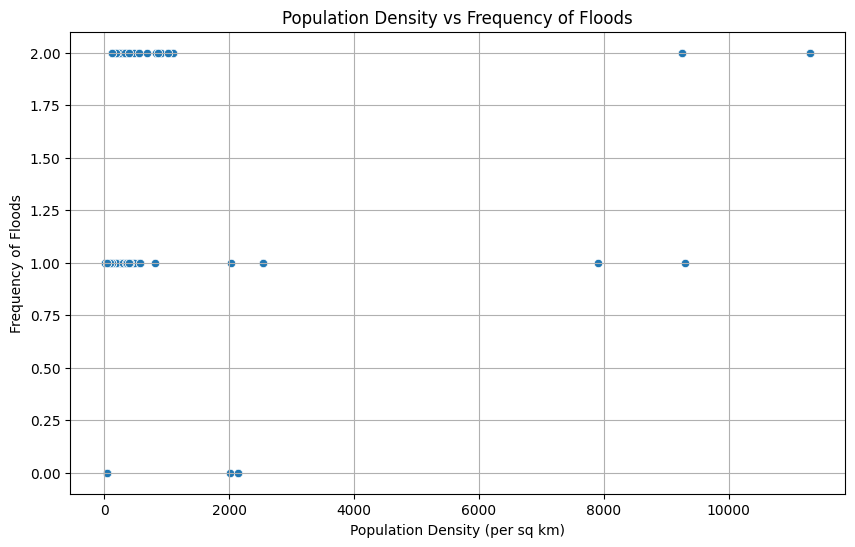

<ipython-input-11-84edf470f899>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



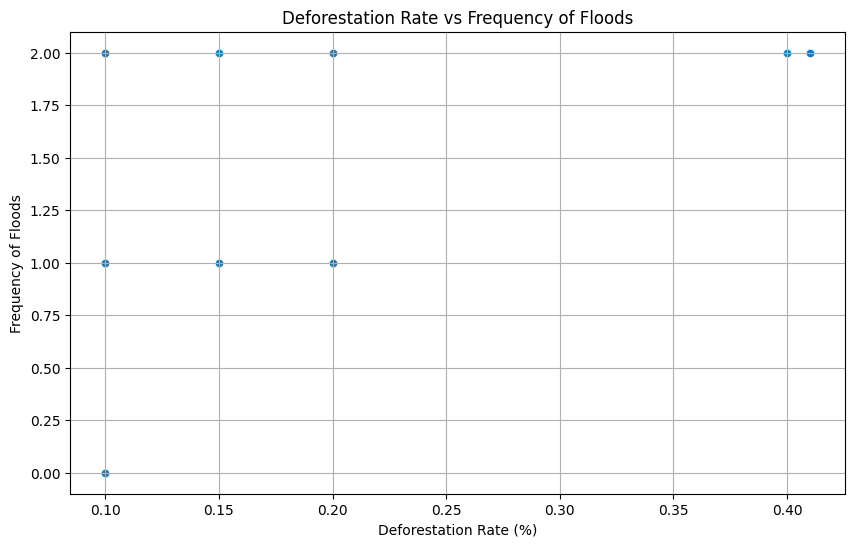

<ipython-input-11-84edf470f899>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



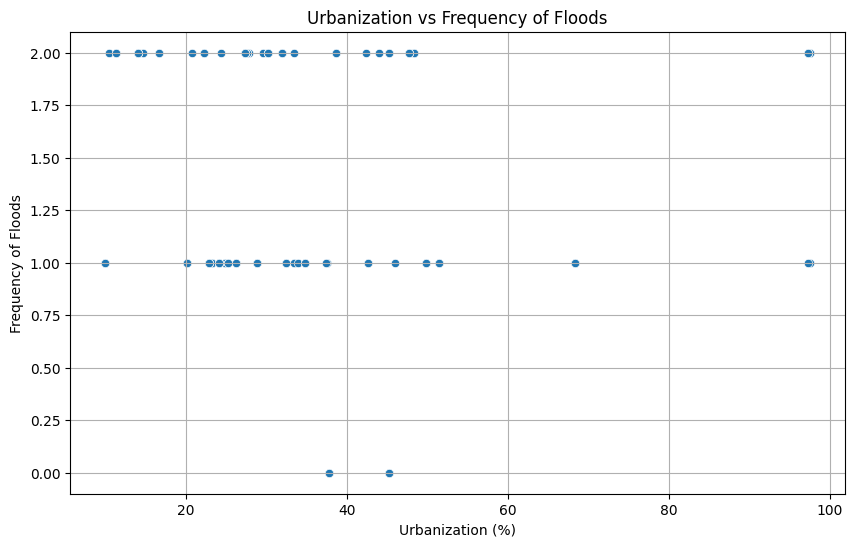

<ipython-input-11-84edf470f899>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



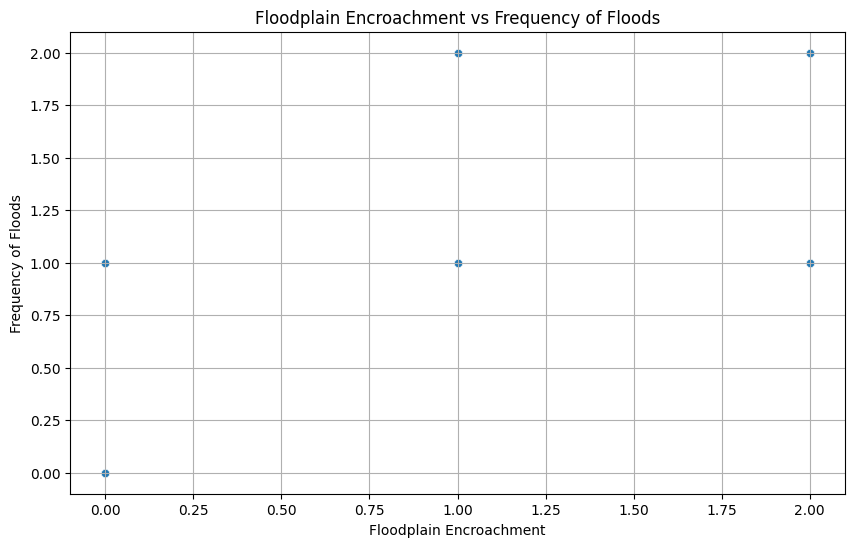

In [ ]:
# Encode categorical variables
df['Floodplain Encroachment'] = df['Floodplain Encroachment'].astype('category').cat.codes
df['Frequency of Floods'] = df['Frequency of Floods'].astype('category').cat.codes

# Create a DataFrame for correlation
df_corr = df[['Population Density (per sq km)', 'Deforestation Rate (%)', 'Urbanization (%)', 'Floodplain Encroachment', 'Frequency of Floods']]
# Plotting function for correlation
def plot_correlation(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, palette='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Separate correlation plots
plot_correlation(df_corr['Population Density (per sq km)'], df_corr['Frequency of Floods'],
                  'Population Density (per sq km)', 'Frequency of Floods', 'Population Density vs Frequency of Floods')

plot_correlation(df_corr['Deforestation Rate (%)'], df_corr['Frequency of Floods'],
                  'Deforestation Rate (%)', 'Frequency of Floods', 'Deforestation Rate vs Frequency of Floods')

plot_correlation(df_corr['Urbanization (%)'], df_corr['Frequency of Floods'],
                  'Urbanization (%)', 'Frequency of Floods', 'Urbanization vs Frequency of Floods')

plot_correlation(df_corr['Floodplain Encroachment'], df_corr['Frequency of Floods'],
                  'Floodplain Encroachment', 'Frequency of Floods', 'Floodplain Encroachment vs Frequency of Floods')


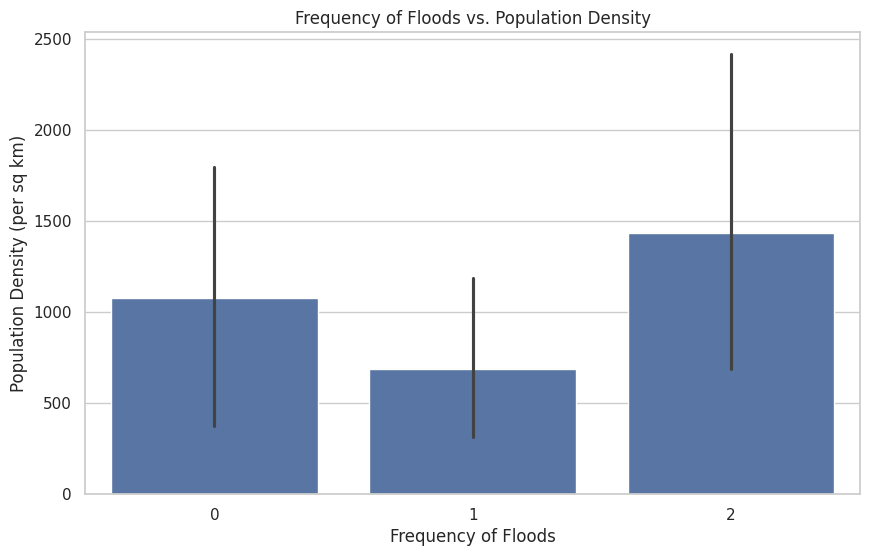

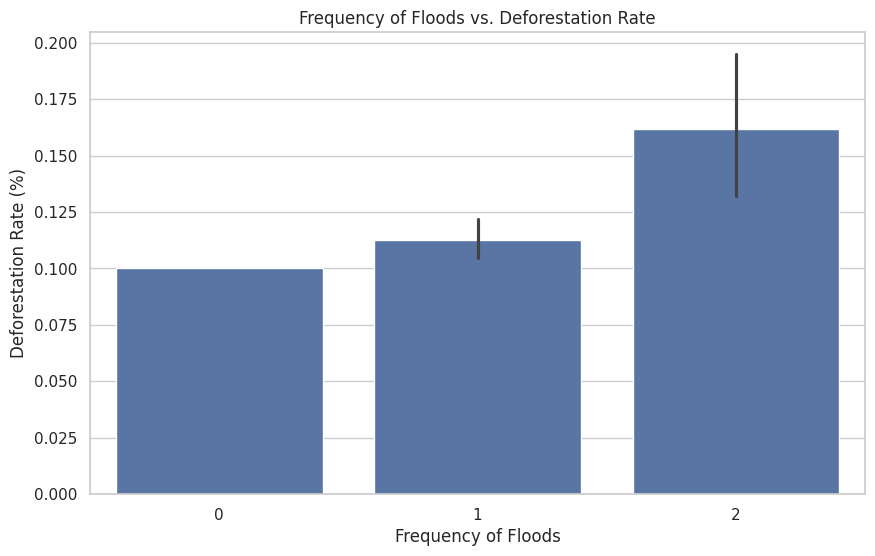

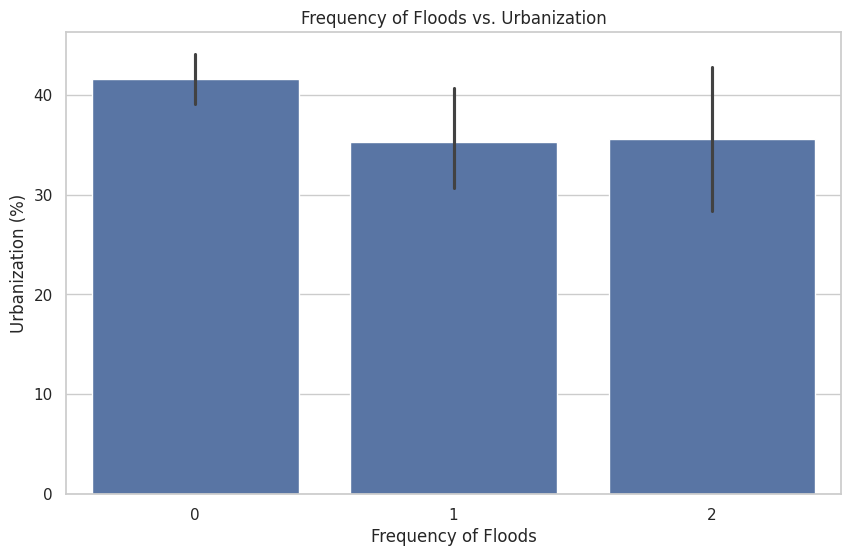

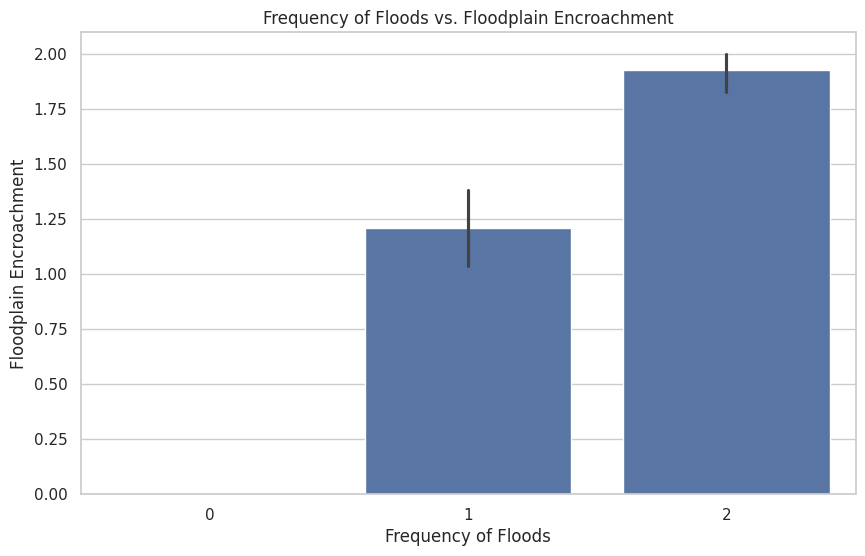

In [ ]:

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot: Frequency of Floods vs. Population Density
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Population Density (per sq km)', data=df)
plt.title('Frequency of Floods vs. Population Density')
plt.ylabel('Population Density (per sq km)')
plt.xlabel('Frequency of Floods')
plt.show()

# Plot: Frequency of Floods vs. Deforestation Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Deforestation Rate (%)', data=df)
plt.title('Frequency of Floods vs. Deforestation Rate')
plt.ylabel('Deforestation Rate (%)')
plt.xlabel('Frequency of Floods')
plt.show()

# Plot: Frequency of Floods vs. Urbanization
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Urbanization (%)', data=df)
plt.title('Frequency of Floods vs. Urbanization')
plt.ylabel('Urbanization (%)')
plt.xlabel('Frequency of Floods')
plt.show()

# Plot: Frequency of Floods vs. Floodplain Encroachment
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency of Floods', y='Floodplain Encroachment', data=df)
plt.title('Frequency of Floods vs. Floodplain Encroachment')
plt.ylabel('Floodplain Encroachment')
plt.xlabel('Frequency of Floods')
plt.show()


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 46.1 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
